In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
info = pd.read_csv("UpdatedNew_v1.csv")
review = pd.read_csv("newreview.csv")

### `country` and `type` are redundant columns, so delete them:

In [2]:
info.drop(['Unnamed: 0', 'country', 'type'], axis=1, inplace=True)

### transform `duarion` to counted in minutes

In [3]:
info['duration'] = info.duration / 60

In [4]:
info.head()

,kdrama_id,drama_name,year,director,screenwriter,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],['Lee Do Ah'],8,25.0,08-02-2023,08-02-2023,Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,['Han Jun hee'],['Kim Bo Tong'],6,50.0,07-28-2023,07-28-2023,Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",8,55.0,07-05-2023,07-26-2023,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],12,45.0,06-30-2023,06-30-2023,Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
4,e632ba76285f438d9448852dd31bcd96,Numbers,2023,['Kim Chil Bong'],"['Oh Hye Seok', 'Jung An']",12,60.0,06-23-2023,07-29-2023,"Friday, Saturday",MBC,15+ - Teens 15 or older,Ho Woo is the first and only high school gradu...,2685,1546


### visualization 0: distribution of each single attribute

In [11]:
info[['rank', 'pop']].dtypes

rank    int64
pop     int64
dtype: object

### visualization 1: scatter plot of rank v.s. pop

Text(0, 0.5, 'popularity')

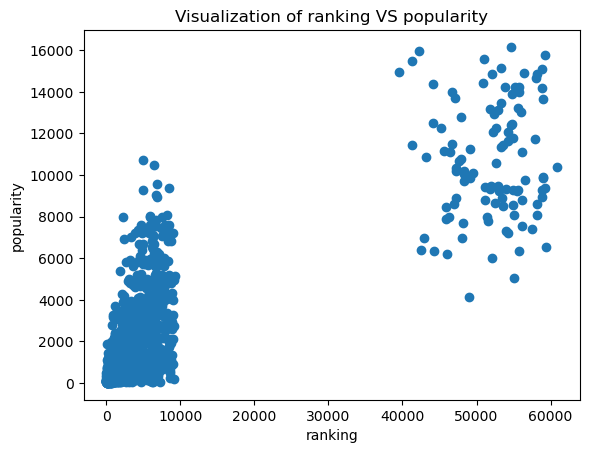

In [12]:
plt.scatter(info['rank'], info['pop'])
plt.title('Visualization of ranking VS popularity')
plt.xlabel('ranking')
plt.ylabel('popularity')